In [16]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from darts.datasets import AirPassengersDataset
from darts import TimeSeries
import warnings
warnings.filterwarnings("ignore")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
# Import data using datetime and set index to datetime
df = pd.read_csv(r'C:\Users\91783\Desktop\DataSet\35_Ambala\Book_35_1_PM.csv',
                                parse_dates=['Date'],
                                index_col=['Date'])

df.head()

,PM2.5
Date,
2021-01-01,75.96
2021-02-01,105.20
2021-03-01,73.10
2021-04-01,57.33
2021-05-01,16.44


In [3]:
def convert2matrix(data_arr, look_back):
    X, Y =[], []
    for i in range(len(data_arr)-look_back):
        d=i+look_back  
        X.append(data_arr[i:d,])
        Y.append(data_arr[d,])
        return np.array(X), np.array(Y)

In [4]:
#Split data set into testing dataset and train dataset
train_size = 300
train, test =df.values[0:train_size,:],df.values[train_size:len(df.values),:]
# setup look_back window 
look_back = 30
#convert dataset into right shape in order to input into the DNN
trainX, trainY = convert2matrix(train, look_back)
testX, testY = convert2matrix(test, look_back)

In [5]:
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping
def model_dnn(look_back):
    model=Sequential()
    model.add(Dense(units=32, input_dim=look_back, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error',  optimizer='adam',metrics = ['mse', 'mae'])
    return model

In [6]:
model=model_dnn(look_back)


In [13]:
print(testX)

[[[ 55.8 ]
  [ 63.39]
  [ 49.79]
  [ 67.2 ]
  [ 80.86]
  [ 73.19]
  [106.85]
  [123.05]
  [181.47]
  [130.93]
  [184.85]
  [207.59]
  [ 75.12]
  [143.86]
  [131.44]
  [117.17]
  [131.3 ]
  [112.23]
  [100.64]
  [106.  ]
  [121.57]
  [138.88]
  [130.45]
  [123.  ]
  [ 93.72]
  [114.18]
  [155.24]
  [119.55]
  [ 97.15]
  [115.33]]]


In [7]:
def call(c):
    history=model.fit(trainX,trainY, epochs=c, batch_size=8, verbose=2, validation_data=(testX,testY),callbacks=[EarlyStopping(monitor='val_loss', patience=10)],shuffle=False)

    def model_loss(history):
        plt.figure(figsize=(8,4))
        plt.plot(history.history['loss'], label='Train Loss')
        plt.plot(history.history['val_loss'], label='Test Loss')
        plt.title('model loss')
        plt.ylabel('loss')
        plt.xlabel('epochs')
        plt.legend(loc='upper right')
        plt.show();
        
    #Taking predictions
    Y_pred = model.predict(testX)
    from sklearn.metrics import mean_squared_error
    mse = mean_squared_error(testY, Y_pred)
    print('MSE')
    print(mse)
    rmse = np.sqrt(mse)
    print('RMSE')
    print(rmse)
    mae = np.mean(np.abs(testY, Y_pred))    # MAE
    print('MAE')
    print(mae)

     

    
    
    train_score = model.evaluate(trainX, trainY, verbose=0)
    print('Train Root Mean Squared Error(RMSE): %.2f; Train Mean Absolute Error(MAE) : %.2f ' 
    % (np.sqrt(train_score[1]), train_score[2]))
    test_score = model.evaluate(testX, testY, verbose=0)
    print('Test Root Mean Squared Error(RMSE): %.2f; Test Mean Absolute Error(MAE) : %.2f ' 
    % (np.sqrt(test_score[1]), test_score[2]))
    model_loss(history)

In [15]:
print(testY)

[[128.55]]


Epoch 1/10
1/1 - 1s - loss: 20028.1406 - mse: 20028.1406 - mae: 141.5208 - val_loss: 60067.7148 - val_mse: 60067.7148 - val_mae: 245.0872 - 592ms/epoch - 592ms/step
Epoch 2/10
1/1 - 0s - loss: 17995.8281 - mse: 17995.8281 - mae: 134.1485 - val_loss: 55039.8633 - val_mse: 55039.8633 - val_mae: 234.6058 - 17ms/epoch - 17ms/step
Epoch 3/10
1/1 - 0s - loss: 16082.9541 - mse: 16082.9541 - mae: 126.8186 - val_loss: 50269.3828 - val_mse: 50269.3828 - val_mae: 224.2083 - 17ms/epoch - 17ms/step
Epoch 4/10
1/1 - 0s - loss: 14289.9336 - mse: 14289.9336 - mae: 119.5405 - val_loss: 45672.5156 - val_mse: 45672.5156 - val_mae: 213.7113 - 2ms/epoch - 2ms/step
Epoch 5/10
1/1 - 0s - loss: 12616.6035 - mse: 12616.6035 - mae: 112.3237 - val_loss: 41276.4531 - val_mse: 41276.4531 - val_mae: 203.1661 - 17ms/epoch - 17ms/step
Epoch 6/10
1/1 - 0s - loss: 11062.1309 - mse: 11062.1309 - mae: 105.1767 - val_loss: 37181.6250 - val_mse: 37181.6250 - val_mae: 192.8254 - 17ms/epoch - 17ms/step
Epoch 7/10
1/1 - 0s - 

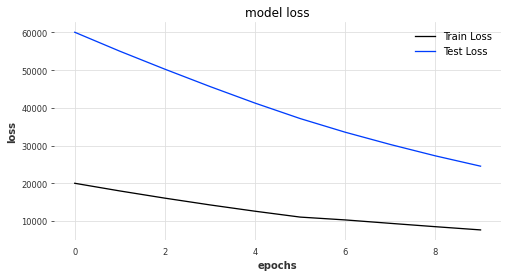

Epoch 1/20
1/1 - 0s - loss: 6850.9102 - mse: 6850.9102 - mae: 82.7702 - val_loss: 23041.9766 - val_mse: 23041.9766 - val_mae: 151.7958 - 45ms/epoch - 45ms/step
Epoch 2/20
1/1 - 0s - loss: 6105.3721 - mse: 6105.3721 - mae: 78.1369 - val_loss: 21660.1230 - val_mse: 21660.1230 - val_mae: 147.1738 - 17ms/epoch - 17ms/step
Epoch 3/20
1/1 - 0s - loss: 5667.8066 - mse: 5667.8066 - mae: 75.2848 - val_loss: 20396.8828 - val_mse: 20396.8828 - val_mae: 142.8177 - 17ms/epoch - 17ms/step
Epoch 4/20
1/1 - 0s - loss: 5248.7432 - mse: 5248.7432 - mae: 72.4482 - val_loss: 19237.2109 - val_mse: 19237.2109 - val_mae: 138.6983 - 19ms/epoch - 19ms/step
Epoch 5/20
1/1 - 0s - loss: 4848.2622 - mse: 4848.2622 - mae: 69.6295 - val_loss: 18168.7090 - val_mse: 18168.7090 - val_mae: 134.7914 - 17ms/epoch - 17ms/step
Epoch 6/20
1/1 - 0s - loss: 4628.4824 - mse: 4628.4824 - mae: 68.0330 - val_loss: 16970.0547 - val_mse: 16970.0547 - val_mae: 130.2692 - 17ms/epoch - 17ms/step
Epoch 7/20
1/1 - 0s - loss: 4457.6895 - 

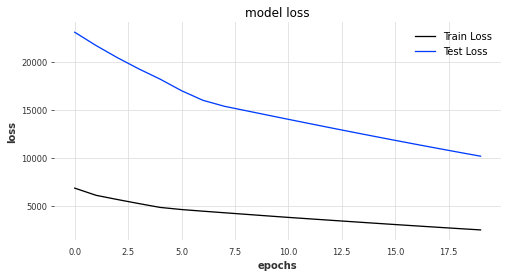

Epoch 1/30
1/1 - 0s - loss: 2379.3179 - mse: 2379.3179 - mae: 48.7783 - val_loss: 9773.5713 - val_mse: 9773.5713 - val_mae: 98.8614 - 31ms/epoch - 31ms/step
Epoch 2/30
1/1 - 0s - loss: 2249.4131 - mse: 2249.4131 - mae: 47.4280 - val_loss: 9385.6807 - val_mse: 9385.6807 - val_mae: 96.8797 - 16ms/epoch - 16ms/step
Epoch 3/30
1/1 - 0s - loss: 2107.3525 - mse: 2107.3525 - mae: 45.9059 - val_loss: 8999.8213 - val_mse: 8999.8213 - val_mae: 94.8674 - 16ms/epoch - 16ms/step
Epoch 4/30
1/1 - 0s - loss: 1815.9851 - mse: 1815.9851 - mae: 42.6144 - val_loss: 8619.7139 - val_mse: 8619.7139 - val_mae: 92.8424 - 16ms/epoch - 16ms/step
Epoch 5/30
1/1 - 0s - loss: 1492.2526 - mse: 1492.2526 - mae: 38.6297 - val_loss: 8248.2373 - val_mse: 8248.2373 - val_mae: 90.8198 - 16ms/epoch - 16ms/step
Epoch 6/30
1/1 - 0s - loss: 1165.1703 - mse: 1165.1703 - mae: 34.1346 - val_loss: 7887.8364 - val_mse: 7887.8364 - val_mae: 88.8135 - 16ms/epoch - 16ms/step
Epoch 7/30
1/1 - 0s - loss: 856.8138 - mse: 856.8138 - mae

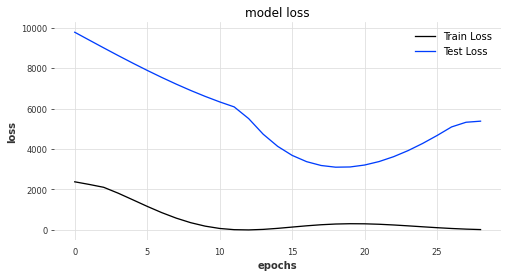

Epoch 1/40
1/1 - 0s - loss: 4.7775 - mse: 4.7775 - mae: 2.1858 - val_loss: 5428.1792 - val_mse: 5428.1792 - val_mae: 73.6762 - 31ms/epoch - 31ms/step
Epoch 2/40
1/1 - 0s - loss: 0.0737 - mse: 0.0737 - mae: 0.2714 - val_loss: 5474.7241 - val_mse: 5474.7241 - val_mae: 73.9914 - 16ms/epoch - 16ms/step
Epoch 3/40
1/1 - 0s - loss: 2.1595 - mse: 2.1595 - mae: 1.4695 - val_loss: 5515.4966 - val_mse: 5515.4966 - val_mae: 74.2664 - 16ms/epoch - 16ms/step
Epoch 4/40
1/1 - 0s - loss: 9.0006 - mse: 9.0006 - mae: 3.0001 - val_loss: 5549.3599 - val_mse: 5549.3599 - val_mae: 74.4940 - 16ms/epoch - 16ms/step
Epoch 5/40
1/1 - 0s - loss: 18.4272 - mse: 18.4272 - mae: 4.2927 - val_loss: 5575.5186 - val_mse: 5575.5186 - val_mae: 74.6694 - 16ms/epoch - 16ms/step
Epoch 6/40
1/1 - 0s - loss: 28.3996 - mse: 28.3996 - mae: 5.3291 - val_loss: 5593.5156 - val_mse: 5593.5156 - val_mae: 74.7898 - 16ms/epoch - 16ms/step
Epoch 7/40
1/1 - 0s - loss: 37.2187 - mse: 37.2187 - mae: 6.1007 - val_loss: 5603.2261 - val_mse

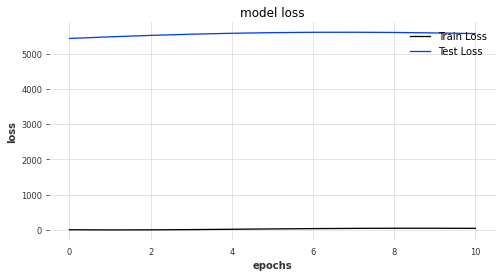

Epoch 1/50
1/1 - 0s - loss: 39.0550 - mse: 39.0550 - mae: 6.2494 - val_loss: 5542.1138 - val_mse: 5542.1138 - val_mae: 74.4454 - 36ms/epoch - 36ms/step
Epoch 2/50
1/1 - 0s - loss: 32.2649 - mse: 32.2649 - mae: 5.6802 - val_loss: 5513.7188 - val_mse: 5513.7188 - val_mae: 74.2544 - 17ms/epoch - 17ms/step
Epoch 3/50
1/1 - 0s - loss: 24.7967 - mse: 24.7967 - mae: 4.9796 - val_loss: 5482.4224 - val_mse: 5482.4224 - val_mae: 74.0434 - 17ms/epoch - 17ms/step
Epoch 4/50
1/1 - 0s - loss: 17.4845 - mse: 17.4845 - mae: 4.1814 - val_loss: 5449.3755 - val_mse: 5449.3755 - val_mae: 73.8199 - 17ms/epoch - 17ms/step
Epoch 5/50
1/1 - 0s - loss: 11.0217 - mse: 11.0217 - mae: 3.3199 - val_loss: 5415.7021 - val_mse: 5415.7021 - val_mae: 73.5915 - 16ms/epoch - 16ms/step
Epoch 6/50
1/1 - 0s - loss: 5.8970 - mse: 5.8970 - mae: 2.4284 - val_loss: 5382.4619 - val_mse: 5382.4619 - val_mae: 73.3653 - 17ms/epoch - 17ms/step
Epoch 7/50
1/1 - 0s - loss: 2.3676 - mse: 2.3676 - mae: 1.5387 - val_loss: 5350.6245 - val

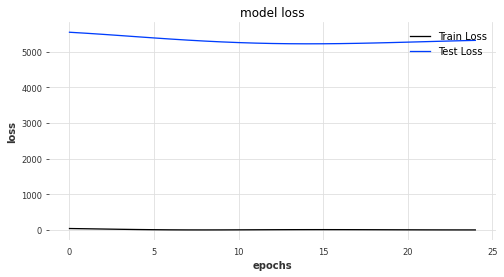

In [8]:
l=[10,20,30,40,50]
for i in l:
    call(i)

In [9]:
#Taking predictions
Y_pred = model.predict(testX)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(testY, Y_pred)

print(mse)
rmse = np.sqrt(mse)
print(rmse)

1/1 [==============================] - 0s 16ms/step
5314.236249894298
72.89880828857423


In [10]:
testY, Y_pred

(array([[128.55]]), array([[55.65119]], dtype=float32))

In [11]:
 Y_pred

array([[55.65119]], dtype=float32)

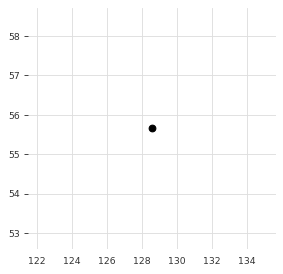

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4),dpi=80)
plt.scatter(testY,Y_pred)
plt.show()